In [491]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt

from sklearn.manifold import MDS,TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
import sklearn.metrics as metrics

In [229]:
df=pd.read_csv('C:/Users/MX03932000/Downloads/df_2.csv')

In [230]:
df

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Fiscal,2016,1,Public Protection,DAT,District Attorney,311.0,Municipal Attorneys' Association,8100,Legal & Court,...,49919,114473.16,0.00,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
1,Calendar,2013,5,Culture & Recreation,ART,Arts Commission,790.0,"SEIU - Miscellaneous, Local 1021",1800,"Budget, Admn & Stats Analysis",...,1225,84077.11,0.00,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05
2,Calendar,2015,4,Community Health,DPH,Public Health,535.0,"SEIU - Human Services, Local 1021",2900,Human Services,...,34873,9980.17,0.00,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64
3,Fiscal,2015,4,Community Health,DPH,Public Health,250.0,"SEIU - Health Workers, Local 1021",2200,Medical & Dental,...,51145,2873.41,0.00,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,Fiscal,2014,5,Culture & Recreation,REC,Recreation and Park Commission,790.0,"SEIU - Miscellaneous, Local 1021",3200,Recreation,...,48705,6701.85,0.00,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291820,Calendar,2015,3,Human Welfare & Neighborhood Development,CSS,Child Support Services,790.0,"SEIU - Miscellaneous, Local 1021",8100,Legal & Court,...,7186,93281.01,0.00,624.00,93905.01,19354.57,12424.50,7742.87,39521.94,133426.95
291821,Fiscal,2015,4,Community Health,DPH,Public Health,250.0,"SEIU - Health Workers, Local 1021",2400,"Lab, Pharmacy & Med Techs",...,14381,62155.51,0.00,1946.40,64101.91,14333.20,12500.56,5179.70,32013.46,96115.37
291822,Calendar,2014,4,Community Health,DPH,Public Health,791.0,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,...,27973,13941.91,0.00,223.47,14165.38,0.00,1223.27,1096.69,2319.96,16485.34
291823,Calendar,2015,4,Community Health,DPH,Public Health,790.0,"SEIU - Miscellaneous, Local 1021",2900,Human Services,...,50828,78865.86,0.00,0.00,78865.86,16223.73,12352.82,6418.95,34995.50,113861.36


In [231]:
df.shape

(291825, 22)

In [232]:
df.columns

Index(['Year Type', 'Year', 'Organization Group Code', 'Organization Group',
       'Department Code', 'Department', 'Union Code', 'Union',
       'Job Family Code', 'Job Family', 'Job Code', 'Job',
       'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries',
       'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits',
       'Total Benefits', 'Total Compensation'],
      dtype='object')

In [233]:
df=df.drop_duplicates()

In [234]:
df.shape

(291825, 22)

In [235]:
for col in df:
    print(col)
    display(df[col].value_counts())

Year Type


Fiscal      167509
Calendar    124316
Name: Year Type, dtype: int64

Year


2015    86067
2014    82291
2013    79380
2016    44087
Name: Year, dtype: int64

Organization Group Code


2    92519
4    63511
1    55563
3    26989
5    26592
6    26351
7      300
Name: Organization Group Code, dtype: int64

Organization Group


Public Works, Transportation & Commerce     92519
Community Health                            63511
Public Protection                           55563
Human Welfare & Neighborhood Development    26989
Culture & Recreation                        26592
General Administration & Finance            26351
General City Responsibilities                 300
Name: Organization Group, dtype: int64

Department Code


DPH    63511
MTA    42574
DSS    24041
POL    23078
REC    16298
AIR    13682
FIR    11761
DPW    11114
SHF     7557
ADM     7373
PUC     6816
LIB     6668
WTR     5910
CWP     4225
CRT     4001
HHP     2980
JUV     2396
CAT     2372
DBI     2280
DAT     2169
ECD     2094
HRD     2066
CON     2060
TIS     2053
PRT     2009
FAM     1977
TTX     1935
CPC     1913
REG     1879
ASR     1318
PDR     1279
ADP     1228
ENV     1015
BOS      895
MYR      894
ECN      849
RET      765
CSS      697
WAR      642
HSS      606
AAM      579
CHF      467
RNT      325
ART      308
UNA      300
HRC      182
ETH      140
CFC      125
WOM      111
SCI      104
CSC       82
PAB       80
CII       26
LLB       16
Name: Department Code, dtype: int64

Department


Public Health                             63511
Municipal Transportation Agency           42574
Human Services                            24041
Police                                    23078
Recreation and Park Commission            16298
Airport Commission                        13682
Fire Department                           11761
General Services Agency - Public Works    11114
Sheriff                                    7557
General Services Agency - City Admin       7373
PUC Public Utilities Commission            6816
Public Library                             6668
PUC Water Department                       5910
PUC Wastewater Enterprise                  4225
Superior Court                             4001
PUC Hetch Hetchy                           2980
Juvenile Probation                         2396
City Attorney                              2372
Department of Building Inspection          2280
District Attorney                          2169
Department of Emergency Management      

Union Code


790.0    82307
21.0     36729
791.0    21944
911.0    19223
253.0    17987
         ...  
220.0       16
969.0       13
302.0        7
604.0        7
353.0        7
Name: Union Code, Length: 69, dtype: int64

Union


SEIU - Miscellaneous, Local 1021                      82307
Prof & Tech Engineers - Miscellaneous, Local 21       36729
SEIU - Staff and Per Diem Nurses, Local 1021          21944
Police Officers' Association                          19221
Transport Workers - Transit Operators, Local 250-A    17987
                                                      ...  
Municipal Executive Association - Police                  7
Port Director                                             7
Management Unrepresented Employees - MTA                  7
Municipal Exec Assoc-Misc                                 2
POA                                                       2
Name: Union, Length: 73, dtype: int64

Job Family Code


2300    30278
9100    23964
Q000    19223
7300    17283
9900    15549
2900    14926
1400    13403
H000    11191
0900     9566
2700     9479
5200     8440
3200     8308
8200     8176
8300     7850
1800     7771
1000     6621
8100     6546
1600     6169
2500     5773
3600     5366
2400     4924
1200     4210
SCRT     4141
5300     3977
7500     3840
3400     3165
7200     2851
9200     2565
7400     2551
2200     2355
9700     2095
2600     2089
1900     1549
6300     1484
4200     1362
8400     1352
5600     1219
2800     1211
1300     1147
1700     1117
2100     1095
6200      940
6100      939
3300      816
4300      790
3500      528
5500      495
5100      300
7100      187
8600      132
4100      132
9300       95
SFRA       71
1500       70
5400       61
1100       43
Name: Job Family Code, dtype: int64

Job Family


Nursing                           30278
Street Transit                    23964
Police Services                   19223
Journeyman Trade                  17283
Public Service Aide               15549
Human Services                    14926
Clerical, Secretarial & Steno     13403
Fire Services                     11191
Management                         9566
Housekeeping & Laundry             9479
Professional Engineering           8440
Recreation                         8308
Protection & Apprehension          8176
Correction & Detention             7850
Budget, Admn & Stats Analysis      7771
Information Systems                6621
Legal & Court                      6546
Payroll, Billing & Accounting      6169
Med Therapy & Auxiliary            5773
Library                            5366
Lab, Pharmacy & Med Techs          4924
Personnel                          4210
SF Superior Court                  4141
Sub-Professional Engineering       3977
Semi-Skilled & General Labor       3840


Job Code


9163    17987
P103    10479
2320     8992
9916     6424
Q004     5854
        ...  
8213        1
3246        1
1367        1
0119        1
4322        1
Name: Job Code, Length: 1133, dtype: int64

Job


Transit Operator                17987
Special Nurse                   10479
Registered Nurse                 8992
Public Svc Aide-Public Works     6424
Police Officer 3                 5854
                                ...  
Trial Delay Reduct Coord            1
Special Assistant 8                 1
Ct Comp Sys Engineer I              1
Police Services Aide                1
Commissioner 16700c, No Pay         1
Name: Job, Length: 1139, dtype: int64

Employee Identifier


22011    19
5909     19
32402    18
18631    17
46290    17
         ..
52609     1
34184     1
13069     1
23587     1
52861     1
Name: Employee Identifier, Length: 52059, dtype: int64

Salaries


0.00         3699
56531.00      388
54703.00      338
55026.00      296
113827.04     287
             ... 
69742.40        1
115174.26       1
91559.91        1
21335.14        1
27117.19        1
Name: Salaries, Length: 214513, dtype: int64

Overtime


0.00        167869
283.85          60
41.33           47
4.84            47
681.23          42
             ...  
85110.33         1
3839.05          1
3334.63          1
2894.19          1
8798.03          1
Name: Overtime, Length: 108176, dtype: int64

Other Salaries


0.00        93224
624.00       1846
250.00       1261
626.40       1136
648.00        649
            ...  
3639.39         1
4285.55         1
10556.23        1
19334.94        1
2282.92         1
Name: Other Salaries, Length: 147465, dtype: int64

Total Salary


0.00        374
250.00      175
1196.00      89
18594.00     87
1230.09      76
           ... 
24094.04      1
99186.49      1
49596.21      1
81915.82      1
49048.81      1
Name: Total Salary, Length: 265962, dtype: int64

Retirement


 0.00        45872
-0.01           96
 0.01           86
 11937.33       82
 23519.67       81
             ...  
 6386.66         1
 21618.55        1
 12314.66        1
 11586.39        1
 13867.61        1
Name: Retirement, Length: 200963, dtype: int64

Health/Dental


0.00        14300
13054.94    11402
12424.50    11315
12918.24    10024
12801.79     8672
            ...  
10712.39        1
13037.61        1
8868.93         1
13343.66        1
738.50          1
Name: Health/Dental, Length: 92759, dtype: int64

Other Benefits


 0.00       932
-0.01       143
 0.01       125
 0.02        81
-0.02        78
           ... 
 9503.11      1
 4921.98      1
 3521.91      1
 633.33       1
 339.26       1
Name: Other Benefits, Length: 243798, dtype: int64

Total Benefits


0.00        434
739.17       47
12.86        45
1178.28      41
1100.47      37
           ... 
36057.99      1
42270.28      1
26881.25      1
1044.69       1
35053.98      1
Name: Total Benefits, Length: 275671, dtype: int64

Total Compensation


1230.09      76
2082.71      47
250.00       45
3995.28      41
1693.00      38
             ..
192684.05     1
420.59        1
171814.14     1
11005.55      1
159421.13     1
Name: Total Compensation, Length: 284433, dtype: int64

In [236]:
df[df["Employee Identifier"]==22011]

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
41549,Calendar,2014,3,Human Welfare & Neighborhood Development,DSS,Human Services,790.0,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",...,22011,0.00,0.00,286.54,286.54,0.00,0.00,22.19,22.19,308.73
62642,Fiscal,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535.0,"SEIU - Human Services, Local 1021",9700,Community Development,...,22011,70210.31,76.52,1380.00,71666.83,13322.98,12800.70,5117.23,31240.91,102907.74
63312,Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535.0,"SEIU - Human Services, Local 1021",9700,Community Development,...,22011,31874.08,76.52,600.00,32550.60,6043.45,5620.88,2324.53,13988.86,46539.46
68023,Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535.0,"SEIU - Human Services, Local 1021",2900,Human Services,...,22011,2665.20,0.00,60.00,2725.20,611.27,573.44,193.80,1378.51,4103.71
70737,Fiscal,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535.0,"SEIU - Human Services, Local 1021",2900,Human Services,...,22011,7839.60,734.02,240.00,8813.62,1918.03,1724.21,678.24,4320.48,13134.10
77754,Fiscal,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535.0,"SEIU - Human Services, Local 1021",2900,Human Services,...,22011,699.60,0.00,60.00,759.60,141.36,149.64,49.56,340.56,1100.16
113922,Calendar,2013,6,General Administration & Finance,ADM,General Services Agency - City Admin,790.0,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",...,22011,1238.60,0.00,0.00,1238.60,0.00,263.15,95.89,359.04,1597.64
119119,Fiscal,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535.0,"SEIU - Human Services, Local 1021",2900,Human Services,...,22011,17956.40,371.66,420.00,18748.06,4121.86,3687.91,1352.26,9162.03,27910.09
157831,Calendar,2014,3,Human Welfare & Neighborhood Development,DSS,Human Services,535.0,"SEIU - Human Services, Local 1021",2900,Human Services,...,22011,33224.36,2079.18,1000.00,36303.54,7461.83,8033.81,2889.43,18385.07,54688.61
162413,Fiscal,2013,6,General Administration & Finance,ADM,General Services Agency - City Admin,790.0,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",...,22011,1238.60,0.00,0.00,1238.60,0.00,270.81,95.89,366.70,1605.30


In [242]:
df=df[df["Year Type"]=="Fiscal"]

In [243]:
#eliminamos la variable type of year porque para el estudio no nos interesa y 
#quitaremos duplicados asegurandonos de conservar información solo mediante 1 año de estudios ya sea fiscal o calendario. 

df_eje= df[['Year', 'Organization Group Code', 'Organization Group',
       'Department Code', 'Department', 'Union Code', 'Union',
       'Job Family Code', 'Job Family', 'Job Code', 'Job',
       'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries',
       'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits',
       'Total Benefits', 'Total Compensation']]

In [244]:
df_eje[df_eje.duplicated(keep=False)].sort_values(by=['Year', 'Organization Group Code', 'Organization Group',
       'Department Code', 'Department', 'Union Code', 'Union',
       'Job Family Code', 'Job Family', 'Job Code', 'Job',
       'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries',
       'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits',
       'Total Benefits', 'Total Compensation'])



,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation


In [245]:
df_eje=df_eje.drop_duplicates()

In [251]:
#vamos a sacar un promedio de empleado
df_eje["Employee Identifier"].value_counts()

5909     11
38209    10
46290    10
32402    10
9686      9
         ..
9839      1
52850     1
43416     1
52813     1
24136     1
Name: Employee Identifier, Length: 52059, dtype: int64

In [287]:
aux=df_eje[['Employee Identifier','Salaries', 'Overtime', 'Other Salaries',
       'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits',
       'Total Benefits', 'Total Compensation']]

In [288]:
aux["conteo"]=1

<ipython-input-288-c4675911e232>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["conteo"]=1


In [289]:
aux.head(2)

,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation,conteo
0,49919,114473.16,0.0,1500.0,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65,1
3,51145,2873.41,0.0,0.0,2873.41,0.00,622.63,222.46,845.09,3718.50,1


In [290]:
aux.isnull().sum()

Employee Identifier    0
Salaries               0
Overtime               0
Other Salaries         0
Total Salary           0
Retirement             0
Health/Dental          0
Other Benefits         0
Total Benefits         0
Total Compensation     0
conteo                 0
dtype: int64

In [291]:
aux=aux.dropna()

In [292]:
import missingno

<AxesSubplot:>

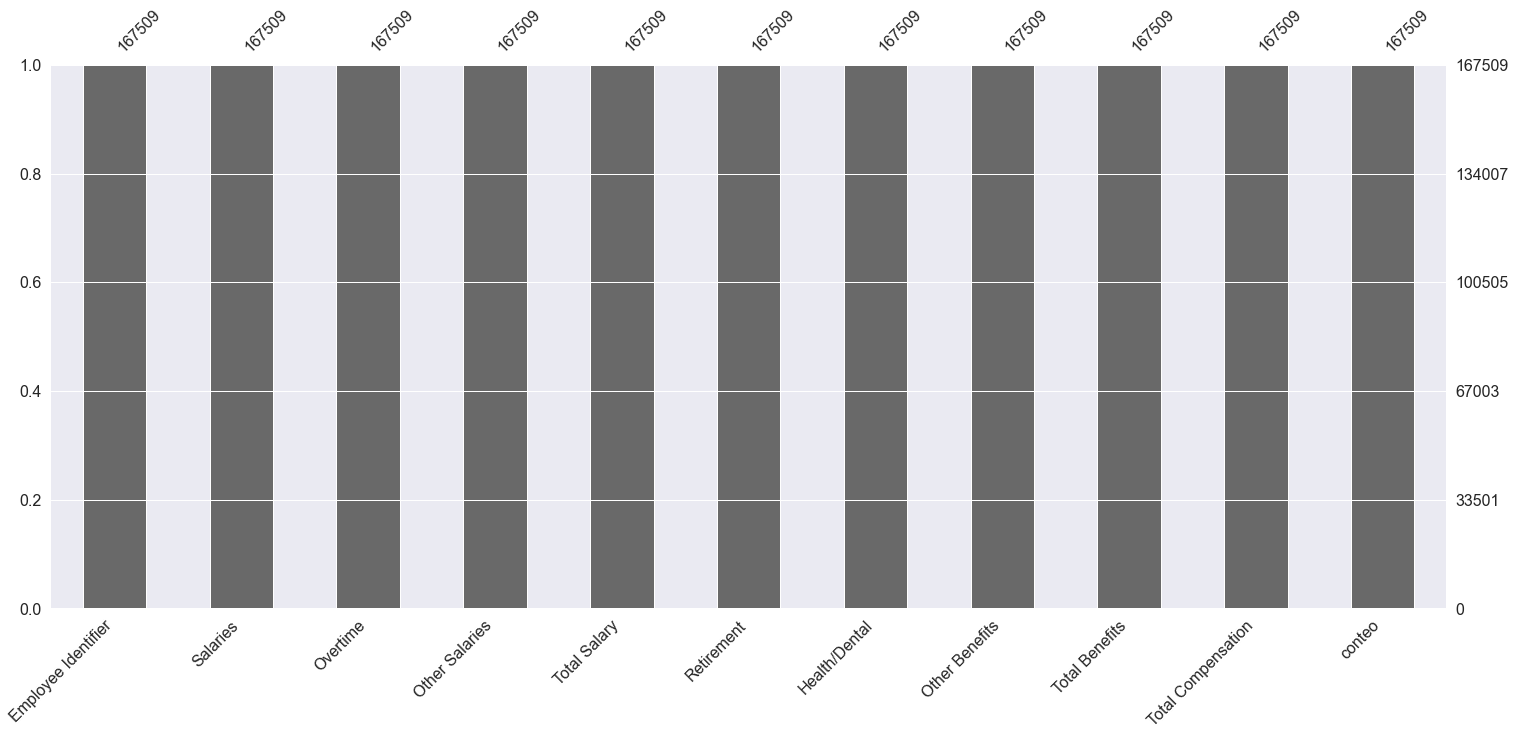

In [293]:
missingno.bar(aux)

In [294]:
#tratamiento outliers mediante sus quantiles

In [295]:
results=pd.DataFrame()
data_iqr=df.copy()
data_per=df.copy()
total=[]
total_per=[]
total_z=[]
indices_=[]

In [296]:
def OUTLIERS(df,cols):
    results=pd.DataFrame()
    data_iqr=df.copy()
    data_per=df.copy()
    total=[]
    total_per=[]
    total_z=[]
    indices_=[]

    for col in cols:
        #IQR
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        INF=Q1-1.5*(IQR)
        SUP=Q3+1.5*(IQR)
    
        
        n_outliers=df[(df[col] < INF) | (df[col] > SUP)].shape[0]
        total.append(n_outliers)
        indices_iqr=list(df[(df[col] < INF) | (df[col] > SUP)].index)
        #data_iqr=data_iqr[~(data_iqr[col] < INF) | (data_iqr[col] > SUP)].reset_index(drop=True)
        
        #Percentiles
        INF_pe=np.percentile(df[col].dropna(),5)
    
        SUP_pe=np.percentile(df[col].dropna(),95)
        n_outliers_per=df[(df[col] < INF_pe) | (df[col] > SUP_pe)].shape[0]
        total_per.append(n_outliers_per)
        indices_per=list(df[(df[col] < INF_pe) | (df[col] > SUP_pe)].index)
        #data_per=data_per[~(data_per[col] < INF_pe) | (data_per[col] > SUP_pe)].reset_index(drop=True)
        
        #MEAN CHANGE
        
        #Obtenemos todos los percentiles además del máximo
        perc_100 = [x / 100 for x in range(100)]
        dist = df[col].describe(perc_100).iloc[4:]
        #Obtenemos el cambio entre percentiles
        change_dist = df[col].describe(perc_100).iloc[4:].diff()
        #Obtenemos el cambio promedio entre percentiles
        mean_change = df[col].describe(
            perc_100).iloc[4:].diff().mean()
        #Si el cambio entre el percentil 99 y el maximo es mayor a el cambio promedio entonces:
        if change_dist["max"] > mean_change:
            #La banda superior será el máximo menos el cambio promedio
            ub = dist["max"] - mean_change
            #si la banda superior es más pequeña que el percentil 99 , modificamos la banda para que tome el percentil 99
            if ub < dist["99%"]:
                ub = dist["99%"]
        else:
        #Si el cambio entre el percentil 99 y el maximo es menor o igual a el cambio promedio entonces se toma el percentil 99
            ub = dist["max"]

        if change_dist["1%"] > mean_change:
            lb = dist["0%"] + mean_change
            if lb > dist["1%"]:
                lb = dist["1%"]
        else:
            lb = dist["0%"]
        n_total_z=df[(df[col] < lb) | (df[col] > ub)].shape[0]
        total_z.append(n_total_z)
        indices_z=list(df[(df[col] < lb) | (df[col] > ub)].index)
        
        indices_.append(aux_outliers(indices_iqr,indices_per,indices_z))
        
    results["features"]=cols
    results["n_outliers_IQR"]=total
    results["n_outliers_Percentil"]=total_per
    results["n_outliers_Mean_Change"]=total_z
    results["n_outliers_IQR_%"]=round((results["n_outliers_IQR"]/df.shape[0])*100,2)
    results["n_outliers_Percentil_%"]=round((results["n_outliers_Percentil"]/df.shape[0])*100,2)
    results["n_outliers_Mean_Change_%"]=round((results["n_outliers_Mean_Change"]/df.shape[0])*100,2)
    results["indices"]=indices_
    results["total_outliers"]=results["indices"].map(lambda x:len(x))
    results["%_outliers"]=results["indices"].map(lambda x:round(((len(x)/df.shape[0])*100),2))
    results=results[['features', 'n_outliers_IQR', 'n_outliers_Percentil',
       'n_outliers_Mean_Change', 'n_outliers_IQR_%', 'n_outliers_Percentil_%',
       'n_outliers_Mean_Change_%',  'total_outliers', '%_outliers','indices']]
    return results
def aux_outliers(a,b,c):
    a=set(a)
    b=set(b)
    c=set(c)
    
    a_=a.intersection(b)

    b_=b.intersection(c)

    c_=a.intersection(c)

    outliers_index=list(set(list(a_)+list(b_)+list(c_)))
    return outliers_index

In [297]:
aux.columns = [ 'c_' + str(col)  for col in aux.columns]

In [298]:
aux.columns

Index(['c_Employee Identifier', 'c_Salaries', 'c_Overtime', 'c_Other Salaries',
       'c_Total Salary', 'c_Retirement', 'c_Health/Dental', 'c_Other Benefits',
       'c_Total Benefits', 'c_Total Compensation', 'c_conteo'],
      dtype='object')

In [299]:
aux=aux.rename(columns={'c_Employee Identifier':'Employee Identifier'})

In [300]:
aux

,Employee Identifier,c_Salaries,c_Overtime,c_Other Salaries,c_Total Salary,c_Retirement,c_Health/Dental,c_Other Benefits,c_Total Benefits,c_Total Compensation,c_conteo
0,49919,114473.16,0.00,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65,1
3,51145,2873.41,0.00,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50,1
4,48705,6701.85,0.00,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64,1
5,19801,45321.18,0.00,0.00,45321.18,9386.03,11780.60,3486.34,24652.97,69974.15,1
6,14135,28305.50,0.00,1193.14,29498.64,6616.52,5793.48,2430.74,14840.74,44339.38,1
...,...,...,...,...,...,...,...,...,...,...,...
291816,36845,25941.30,0.00,0.00,25941.30,5818.66,3687.91,2122.81,11629.38,37570.68,1
291817,9047,752.00,0.00,8.96,760.96,0.00,293.04,59.06,352.10,1113.06,1
291818,46451,56974.00,1811.10,1524.48,60309.58,10607.05,12801.79,4921.72,28330.56,88640.14,1
291819,1744,114900.88,93181.73,18206.93,226289.54,22716.48,16011.78,3823.00,42551.26,268840.80,1


In [301]:
outliers=OUTLIERS(aux,list(aux.filter(like="c_")))

In [302]:
outliers

,features,n_outliers_IQR,n_outliers_Percentil,n_outliers_Mean_Change,n_outliers_IQR_%,n_outliers_Percentil_%,n_outliers_Mean_Change_%,total_outliers,%_outliers,indices
0,c_Salaries,911,16745,2,0.54,10.00,0.0,912,0.54,"[110592, 2049, 276480, 131076, 63496, 282633, ..."
1,c_Overtime,28287,8402,2,16.89,5.02,0.0,8377,5.00,"[262145, 196610, 262147, 32774, 229384, 131081..."
2,c_Other Salaries,17419,8429,2,10.40,5.03,0.0,8378,5.00,"[229384, 229388, 262156, 131094, 163867, 19664..."
3,c_Total Salary,1076,16752,2,0.64,10.00,0.0,1077,0.64,"[79872, 159748, 229384, 282633, 147467, 6158, ..."
4,c_Retirement,576,8600,3,0.34,5.13,0.0,576,0.34,"[110592, 75780, 131076, 34822, 63496, 282633, ..."
5,c_Health/Dental,0,8515,2,0.00,5.08,0.0,2,0.00,"[140656, 106271]"
6,c_Other Benefits,3165,16752,4,1.89,10.00,0.0,3165,1.89,"[114688, 172035, 131076, 139273, 262154, 57355..."
7,c_Total Benefits,109,16752,2,0.07,10.00,0.0,110,0.07,"[265216, 2049, 230918, 18951, 83462, 282633, 2..."
8,c_Total Compensation,464,16752,2,0.28,10.00,0.0,465,0.28,"[79872, 282633, 18450, 188437, 210973, 63521, ..."
9,c_conteo,0,0,0,0.00,0.00,0.0,0,0.00,[]


In [303]:
indices=list(outliers["indices"].values)

In [304]:
import functools


In [305]:
indices=list(set(functools.reduce(lambda x,y: x+y, indices)))

In [306]:
df=aux[~aux.index.isin(indices)].reset_index(drop=True)

In [307]:
df.shape

(149439, 11)

In [309]:
final_=aux.groupby(['Employee Identifier'],as_index=False).agg({'c_Salaries':'mean', 'c_Overtime':'mean', 'c_Other Salaries':'mean', 'c_Total Salary':'mean',
       'c_Retirement':'mean', 'c_Health/Dental':'mean', 'c_Other Benefits':'mean', 'c_Total Benefits':'mean',
       'c_Total Compensation':'mean', 'c_conteo':sum})


In [310]:

final=final_.drop(columns=['Employee Identifier'])

In [313]:
final

,c_Salaries,c_Overtime,c_Other Salaries,c_Total Salary,c_Retirement,c_Health/Dental,c_Other Benefits,c_Total Benefits,c_Total Compensation,c_conteo
0,29789.1000,0.0000,4739.1800,34528.280,0.0000,0.0000,2727.7200,2727.7200,37256.0000,1
1,11105.7150,0.0000,439.1450,11544.860,1017.5350,4959.5900,904.4950,6881.6200,18426.4800,2
2,24574.8500,0.0000,840.3100,25415.160,5931.6775,6366.5725,1859.8025,14158.0525,39573.2125,4
3,46172.7000,12476.1150,1999.2000,60648.015,8697.7500,6941.5050,4779.8900,20419.1450,81067.1600,2
4,68816.0580,0.0000,0.0000,68816.058,13871.3960,10176.7420,5673.9540,29722.0920,98538.1500,5
...,...,...,...,...,...,...,...,...,...,...
52054,55486.4300,22672.0575,2587.8475,80746.335,15476.7250,11287.2675,6126.8025,32890.7950,113637.1300,4
52055,142243.7850,20.4000,21885.6500,164149.835,29396.6075,12569.5925,4386.9275,46353.1275,210502.9625,4
52056,28302.3425,3419.0150,2055.1075,33776.465,4050.1625,7665.9775,2700.4000,14416.5400,48193.0050,4
52057,131341.5950,31185.2500,16383.7250,178910.570,28442.4800,15506.2975,3074.5725,47023.3500,225933.9200,4


In [525]:
X=final[['c_Salaries', 'c_Overtime', 'c_Other Salaries',
       'c_Total Salary', 'c_Retirement', 'c_Health/Dental', 'c_Other Benefits',
       'c_Total Benefits', 'c_Total Compensation']]

In [526]:


ss = StandardScaler()

sdf = ss.fit_transform(X)

In [527]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score

In [528]:
df_sdf=pd.DataFrame(data=sdf,columns=list(X.columns))

In [529]:
X_sample=df_sdf.sample(frac=0.1, replace=False, random_state=1)

In [530]:
from sklearn.decomposition import PCA

In [531]:
n_components = 2
pca = PCA(n_components=n_components)
X_sample_pca = pd.DataFrame(pca.fit_transform(X_sample),columns=[f"p_{i}" for i in  range(1,n_components+1)])

# DBSCAN


In [344]:
n_clusters = []
n_noise_points = []
silhouette_scores = []
calinski_harabasz_scores = []

for p in [2, 4, 8, 12]:
    n_clusters_p = []
    n_noise_points_p = []
    silhouette_scores_p = []
    calinski_harabasz_scores_p = []

    for eps in np.arange(.04, 1.5, 0.1):
        dst = DBSCAN(eps=eps, min_samples=3)
        Y_pred_t = dst.fit_predict(X_sample)

        n_clusters_p.append(np.max(Y_pred_t) + 1)
        n_noise_points_p.append(np.sum(Y_pred_t == -1))
        silhouette_scores_p.append(silhouette_score(X_sample, Y_pred_t))
        calinski_harabasz_scores_p.append(calinski_harabasz_score(X_sample, Y_pred_t))

    n_clusters.append(n_clusters_p)
    n_noise_points.append(n_noise_points_p)
    silhouette_scores.append(silhouette_scores_p)
    calinski_harabasz_scores.append(calinski_harabasz_scores_p)

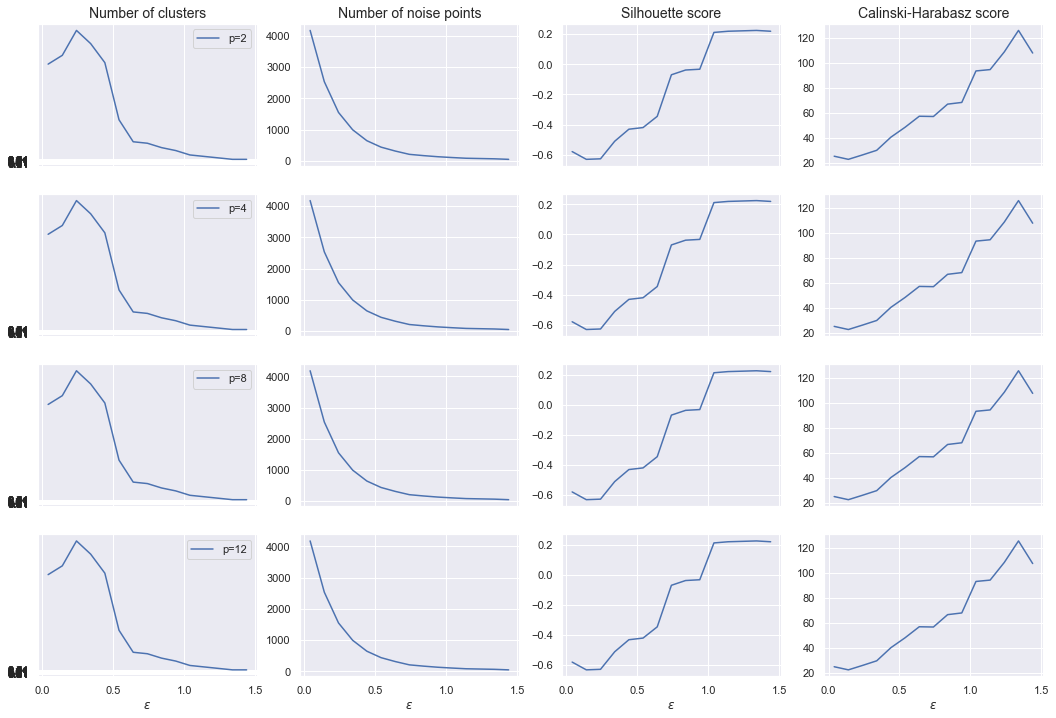

In [349]:

fig, ax = plt.subplots(4, 4, figsize=(18, 12), sharex=True)

for idx, p in enumerate([2, 4, 8, 12]):
    x = np.arange(.04, 1.5, 0.1)

    ax[idx, 0].plot(x, n_clusters[idx], label='p={}'.format(p))
    ax[idx, 1].plot(x, n_noise_points[idx], label='p={}'.format(p))
    ax[idx, 2].plot(x, silhouette_scores[idx], label='p={}'.format(p))
    ax[idx, 3].plot(x, calinski_harabasz_scores[idx], label='p={}'.format(p))

ax[0, 0].set_title('Number of clusters', fontsize=14)
ax[0, 1].set_title('Number of noise points', fontsize=14)
ax[0, 2].set_title('Silhouette score', fontsize=14)
ax[0, 3].set_title('Calinski-Harabasz score', fontsize=14)

for i in range(4):
    ax[i, 0].set_yticks(np.arange(.01, 3, .1))
    ax[i, 0].legend()
    ax[3, i].set_xlabel(r'$\epsilon$')

plt.show()

In [350]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [355]:
ds = DBSCAN(eps=1, min_samples=3)
Y_pred =ds.fit_predict(X_sample)
print('Number of clusters: {}'.format(np.max(Y_pred) + 1))
print('Number of noise points: {}'.format(np.sum(Y_pred==-1)))
print('Silhouette score: {:.3f}'.format(silhouette_score(X_sample_pca, Y_pred)))
print('Calinski-Harabaz score: {:.3f}'.format(calinski_harabasz_score(X_sample_pca,
Y_pred)))

Number of clusters: 5
Number of noise points: 125
Silhouette score: 0.398
Calinski-Harabaz score: 117.395


In [532]:
X_sample_pca["cl_dbscan"] = Y_pred

In [533]:
X_sample_pca["cl_dbscan"].value_counts(1)

 0    0.973300
-1    0.024011
 1    0.000960
 4    0.000576
 2    0.000576
 3    0.000576
Name: cl_dbscan, dtype: float64

In [534]:
from sklearn.tree import DecisionTreeClassifier

In [535]:
X.shape


(52059, 9)

In [536]:
indices=X_sample.index

In [537]:
a=X[X.index.isin(indices)]

In [549]:
a["cl_dbscan"] = Y_pred

<ipython-input-549-bca253f4b97e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["cl_dbscan"] = Y_pred


In [539]:
tree=DecisionTreeClassifier()

In [540]:
tree.fit(X_sample,a['cl_dbscan'])

DecisionTreeClassifier()

In [541]:
importances=tree.feature_importances_

In [542]:
feature_importance= sorted(zip(importances, list(X_sample.columns)), reverse=True)

In [543]:
data_tree = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(data_tree['importance'])
feature= list(data_tree['feature'])

In [544]:
data_tree

,importance,feature
0,0.428389,c_Other Salaries
1,0.172113,c_Total Benefits
2,0.108850,c_Overtime
3,0.107148,c_Total Salary
4,0.079483,c_Other Benefits
5,0.053661,c_Health/Dental
6,0.035925,c_Salaries
7,0.014405,c_Total Compensation
8,0.000025,c_Retirement


<AxesSubplot:xlabel='feature'>

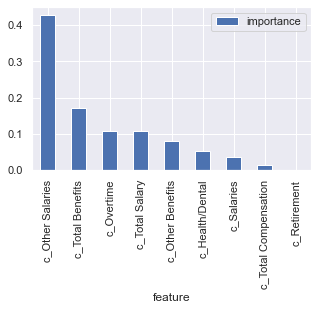

In [552]:
data_tree.plot.bar(x='feature',y='importance')

In [550]:
varc=a.columns

In [551]:

a[varc].groupby('cl_dbscan').mean().style.background_gradient(cmap='Blues')

,c_Salaries,c_Overtime,c_Other Salaries,c_Total Salary,c_Retirement,c_Health/Dental,c_Other Benefits,c_Total Benefits,c_Total Compensation
cl_dbscan,,,,,,,,,
-1,54593.969041,4065.772144,3444.047621,62103.788807,10757.790527,7828.798473,3898.338500,22484.927500,84588.716307
0,53321.423151,3626.406962,3563.521815,60511.351927,10531.840019,7752.369012,3998.280328,22282.489359,82793.841286
1,36261.269000,6741.077800,3877.564200,46879.911000,7641.427200,6138.942700,3330.197400,17110.567300,63990.478300
2,34053.480000,10245.165833,4118.683333,48417.329167,7037.853333,5803.505833,3732.151667,16573.510833,64990.840000
3,91569.068000,0.000000,622.378000,92191.446000,18349.651167,11845.669000,7111.577333,37306.897500,129498.343500
4,41881.653333,1371.684500,1802.816667,45056.154500,7902.484167,8242.624333,3521.691500,19666.800000,64722.954500


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='p_1', ylabel='p_2'>

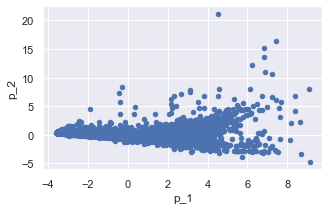

In [364]:
X_sample_pca.plot.scatter('p_1','p_2')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


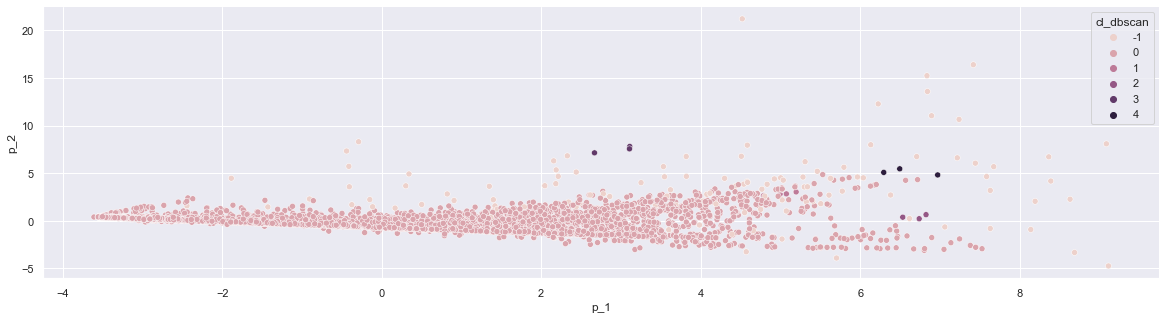

In [365]:
#-1 es el ruido en un modelo 

plt.subplots(figsize=(20,5))
sns.scatterplot(X_sample_pca["p_1"], X_sample_pca["p_2"],hue=X_sample_pca['cl_dbscan'])
sns.despine()
plt.show()

# Gaussianos Mixtos

In [367]:
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pd.DataFrame(pca.fit_transform(df_sdf),columns=[f"p_{i}" for i in  range(1,n_components+1)])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='p_1', ylabel='p_2'>

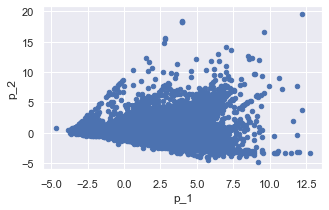

In [368]:
X_pca.plot.scatter('p_1','p_2')

2
3
4
5
6
7
8
9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


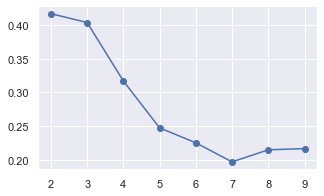

In [370]:
l = []
for k in range(2,10):
    print(k)
    
    km = GaussianMixture(n_components=k,covariance_type='spherical',)
    
    km.fit(df_sdf)
    l.append((k,silhouette_score(df_sdf,km.predict(df_sdf))))
silueta = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(silueta['k'],silueta['silueta'],marker='o')

In [371]:
l_bic = []
l_aic=[]
for k in range(2,10):
    km = GaussianMixture(n_components=k)
    km.fit(df_sdf)
    l_bic.append((k,km.bic(df_sdf)))
    l_aic.append((k,km.aic(df_sdf)))
aic = pd.DataFrame(l_aic,columns=['k','aic'])
bic = pd.DataFrame(l_bic,columns=['k','bic'])

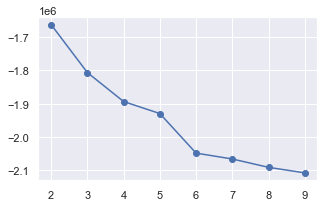

In [372]:
plt.plot(aic['k'],aic['aic'],marker='o')

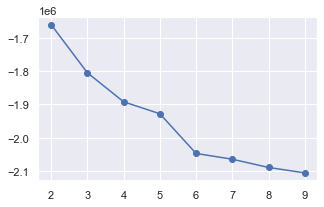

In [373]:
plt.plot(bic['k'],bic['bic'],marker='o')

In [440]:
Xs_df=pd.DataFrame(df_sdf, columns = list(df_sdf.columns))

In [553]:


gmm=GaussianMixture(n_components=4,covariance_type='spherical')

In [554]:
gmm.fit_predict(df_sdf)

array([3, 3, 3, ..., 3, 0, 2], dtype=int64)

In [555]:
X_pca["cl_gmm"] = Xs_df["cl_gmm"] = X["cl_gmm"] = gmm.predict(df_sdf)

In [556]:
Xs_df['cl_gmm'].value_counts(1)

2    0.320982
0    0.263951
3    0.226109
1    0.188959
Name: cl_gmm, dtype: float64

In [557]:
from sklearn.tree import DecisionTreeClassifier

In [558]:
tree=DecisionTreeClassifier()

In [559]:
tree.fit(df_sdf,X['cl_gmm'])

DecisionTreeClassifier()

In [560]:
importances=tree.feature_importances_

In [561]:
feature_importance= sorted(zip(importances, list(X.columns)), reverse=True)

data_tree = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(data_tree['importance'])
feature= list(data_tree['feature'])

In [562]:
data_tree

,importance,feature
0,0.321059,c_Total Benefits
1,0.302343,c_Total Salary
2,0.263828,c_Total Compensation
3,0.032323,c_Overtime
4,0.027633,c_Other Salaries
5,0.022213,c_Other Benefits
6,0.022148,c_Health/Dental
7,0.005026,c_Salaries
8,0.003426,c_Retirement


<AxesSubplot:xlabel='feature'>

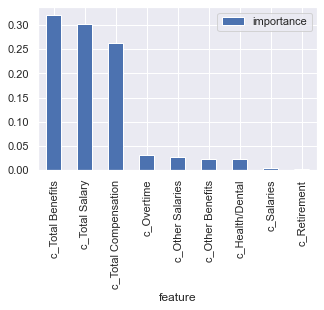

In [563]:
data_tree.plot.bar(x='feature',y='importance')

In [564]:
varc=list(X.columns)

In [565]:
X

,c_Salaries,c_Overtime,c_Other Salaries,c_Total Salary,c_Retirement,c_Health/Dental,c_Other Benefits,c_Total Benefits,c_Total Compensation,cl_gmm
0,29789.1000,0.0000,4739.1800,34528.280,0.0000,0.0000,2727.7200,2727.7200,37256.0000,3
1,11105.7150,0.0000,439.1450,11544.860,1017.5350,4959.5900,904.4950,6881.6200,18426.4800,3
2,24574.8500,0.0000,840.3100,25415.160,5931.6775,6366.5725,1859.8025,14158.0525,39573.2125,3
3,46172.7000,12476.1150,1999.2000,60648.015,8697.7500,6941.5050,4779.8900,20419.1450,81067.1600,2
4,68816.0580,0.0000,0.0000,68816.058,13871.3960,10176.7420,5673.9540,29722.0920,98538.1500,2
...,...,...,...,...,...,...,...,...,...,...
52054,55486.4300,22672.0575,2587.8475,80746.335,15476.7250,11287.2675,6126.8025,32890.7950,113637.1300,0
52055,142243.7850,20.4000,21885.6500,164149.835,29396.6075,12569.5925,4386.9275,46353.1275,210502.9625,0
52056,28302.3425,3419.0150,2055.1075,33776.465,4050.1625,7665.9775,2700.4000,14416.5400,48193.0050,3
52057,131341.5950,31185.2500,16383.7250,178910.570,28442.4800,15506.2975,3074.5725,47023.3500,225933.9200,0


In [566]:
X[varc].groupby('cl_gmm').mean().style.background_gradient(cmap='Blues')

,c_Salaries,c_Overtime,c_Other Salaries,c_Total Salary,c_Retirement,c_Health/Dental,c_Other Benefits,c_Total Benefits,c_Total Compensation
cl_gmm,,,,,,,,,
0,103853.860103,10504.347456,9383.605302,123741.812860,21304.067638,11377.998614,6851.477987,39533.544238,163275.357099
1,4366.118115,62.773377,141.993467,4570.884959,216.591087,1125.745844,365.682837,1708.019768,6278.904727
2,61976.400337,2061.106085,2087.582857,66125.089279,12906.550008,10728.276268,5130.931183,28765.757459,94890.846739
3,25248.144113,627.811002,1135.831978,27011.787093,3777.354451,5055.788853,2150.789253,10983.932557,37995.719649


In [567]:
from scipy.stats import kruskal

In [568]:
ls_res = []
for feature in X.columns:
    l = []
    for cl in X["cl_gmm"].unique():
        l.append(X.loc[X["cl_gmm"]==cl, feature].to_list())
    kr = kruskal(*l)
    ls_res.append((feature,kr.pvalue))

In [569]:
data_kruskal=pd.DataFrame(ls_res,columns=['Feature','p_value']).round(3)

In [570]:
data_kruskal

,Feature,p_value
0,c_Salaries,0.0
1,c_Overtime,0.0
2,c_Other Salaries,0.0
3,c_Total Salary,0.0
4,c_Retirement,0.0
5,c_Health/Dental,0.0
6,c_Other Benefits,0.0
7,c_Total Benefits,0.0
8,c_Total Compensation,0.0
9,cl_gmm,0.0


In [571]:
variables_cambio=data_kruskal[data_kruskal['p_value']<.05]['Feature'].to_list()

In [572]:
from statsmodels.stats.multicomp import MultiComparison

In [573]:
for v in variables_cambio:
    print(v)
    mc = MultiComparison(X[v],X['cl_gmm'])
    display(mc.tukeyhsd().summary())
    print('\n')

c_Salaries


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-99487.742,0.001,-100142.235,-98833.249,True
0,2,-41877.4598,0.001,-42448.1434,-41306.7761,True
0,3,-78605.716,0.001,-79228.0857,-77983.3463,True
1,2,57610.2822,0.001,56980.5148,58240.0497,True
1,3,20882.026,0.001,20205.0686,21558.9834,True
2,3,-36728.2562,0.001,-37324.5699,-36131.9426,True




c_Overtime


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-10441.5741,0.001,-10718.3278,-10164.8204,True
0,2,-8443.2414,0.001,-8684.5561,-8201.9267,True
0,3,-9876.5365,0.001,-10139.7067,-9613.3662,True
1,2,1998.3327,0.001,1732.0343,2264.6311,True
1,3,565.0376,0.001,278.7849,851.2904,True
2,3,-1433.2951,0.001,-1685.4475,-1181.1427,True




c_Other Salaries


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-9241.6118,0.001,-9452.9471,-9030.2765,True
0,2,-7296.0224,0.001,-7480.2958,-7111.7491,True
0,3,-8247.7733,0.001,-8448.736,-8046.8106,True
1,2,1945.5894,0.001,1742.238,2148.9408,True
1,3,993.8385,0.001,775.2495,1212.4275,True
2,3,-951.7509,0.001,-1144.3001,-759.2017,True




c_Total Salary


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-119170.9279,0.001,-119875.2795,-118466.5763,True
0,2,-57616.7236,0.001,-58230.8813,-57002.5659,True
0,3,-96730.0258,0.001,-97399.8069,-96060.2446,True
1,2,61554.2043,0.001,60876.4619,62231.9467,True
1,3,22440.9021,0.001,21712.3749,23169.4293,True
2,3,-39113.3022,0.001,-39755.0423,-38471.562,True




c_Retirement


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-21087.4766,0.001,-21230.8402,-20944.1129,True
0,2,-8397.5176,0.001,-8522.5233,-8272.512,True
0,3,-17526.7132,0.001,-17663.0404,-17390.386,True
1,2,12689.9589,0.001,12552.0113,12827.9066,True
1,3,3560.7634,0.001,3412.479,3709.0478,True
2,3,-9129.1956,0.001,-9259.8153,-8998.5758,True




c_Health/Dental


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-10252.2528,0.001,-10323.1743,-10181.3313,True
0,2,-649.7223,0.001,-711.5622,-587.8825,True
0,3,-6322.2098,0.001,-6389.6503,-6254.7692,True
1,2,9602.5304,0.001,9534.2882,9670.7726,True
1,3,3930.043,0.001,3856.6873,4003.3988,True
2,3,-5672.4874,0.001,-5737.1045,-5607.8703,True




c_Other Benefits


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-6485.7951,0.001,-6566.8092,-6404.7811,True
0,2,-1720.5468,0.001,-1791.1868,-1649.9068,True
0,3,-4700.6887,0.001,-4777.7265,-4623.651,True
1,2,4765.2483,0.001,4687.2949,4843.2018,True
1,3,1785.1064,0.001,1701.3117,1868.9011,True
2,3,-2980.1419,0.001,-3053.9544,-2906.3294,True




c_Total Benefits


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-37825.5245,0.001,-38049.4247,-37601.6242,True
0,2,-10767.7868,0.001,-10963.0161,-10572.5575,True
0,3,-28549.6117,0.001,-28762.5226,-28336.7007,True
1,2,27057.7377,0.001,26842.296,27273.1794,True
1,3,9275.9128,0.001,9044.3275,9507.498,True
2,3,-17781.8249,0.001,-17985.8222,-17577.8276,True




c_Total Compensation


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-156996.4524,0.001,-157865.1649,-156127.7399,True
0,2,-68384.5104,0.001,-69141.9822,-67627.0386,True
0,3,-125279.6374,0.001,-126105.7125,-124453.5624,True
1,2,88611.942,0.001,87776.0479,89447.8361,True
1,3,31716.8149,0.001,30818.2854,32615.3445,True
2,3,-56895.1271,0.001,-57686.6178,-56103.6364,True




cl_gmm


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:1291: RuntimeWarning: divide by zero encountered in true_divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,1.0,0.001,1.0,1.0,True
0,2,2.0,0.001,2.0,2.0,True
0,3,3.0,0.001,3.0,3.0,True
1,2,1.0,0.001,1.0,1.0,True
1,3,2.0,0.001,2.0,2.0,True
2,3,1.0,0.001,1.0,1.0,True


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


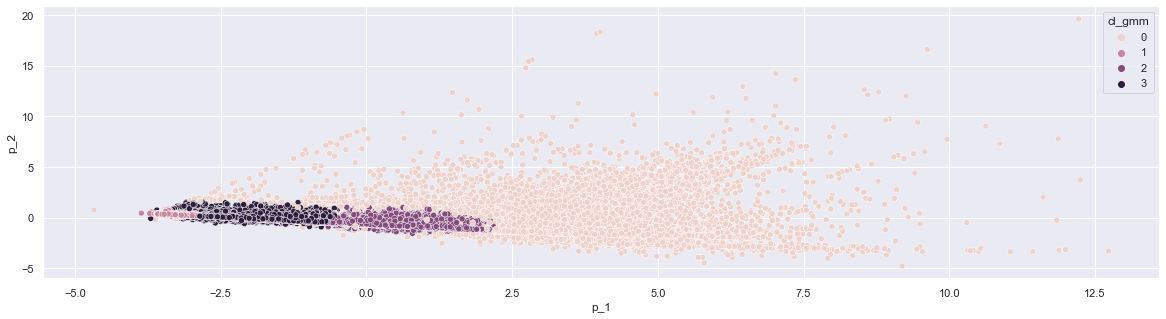

In [574]:
plt.subplots(figsize=(20,5))
sns.scatterplot(X_pca["p_1"], X_pca["p_2"],hue=X_pca['cl_gmm'])
sns.despine()
plt.show()